In [167]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [168]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [169]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [170]:
from sklearn.model_selection import train_test_split
# 여기서는 시계열 데이터이므로, 마지막 부분을 테스트 세트로 사용하는 것이 일반적입니다.
train_size = int(len(X) * 0.8)  # 예: 80%를 훈련 데이터로 사용
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'훈련 데이터 크기: {X_train.shape}')
print(f'테스트 데이터 크기: {X_test.shape}')

훈련 데이터 크기: (250, 12, 1)
테스트 데이터 크기: (63, 12, 1)


In [164]:
# RNN 모델 정의
rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(window, 1)),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

# RNN 모델 컴파일 및 학습
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0818
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2967e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4046e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1229e-04
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4375e-04
Ep

In [171]:
# 4. LSTM 모델
lstm_model = tf.keras.Sequential([
    tf.keras.Input(shape=(window,1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0646
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 16/50
32/32 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RNN 모델 테스트 데이터 MSE: 0.003271354178101447


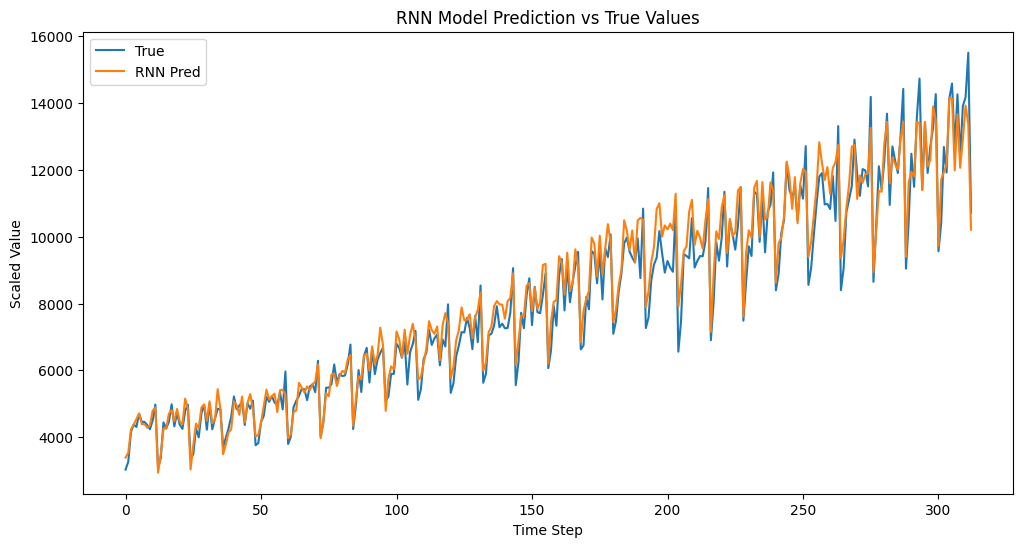

In [165]:
# RNN 모델 예측
rnn_pred_test = rnn_model.predict(X_test)
rnn_pred_full = rnn_model.predict(X)

# RNN 모델 MSE 계산
rnn_mse = mean_squared_error(y_test, rnn_pred_test)

print(f'RNN 모델 테스트 데이터 MSE: {rnn_mse}')

# RNN 모델 전체 데이터 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(rnn_pred_full), label='RNN Pred')
plt.title('RNN Model Prediction vs True Values')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM 모델 테스트 데이터 MSE: 0.017363210203462973


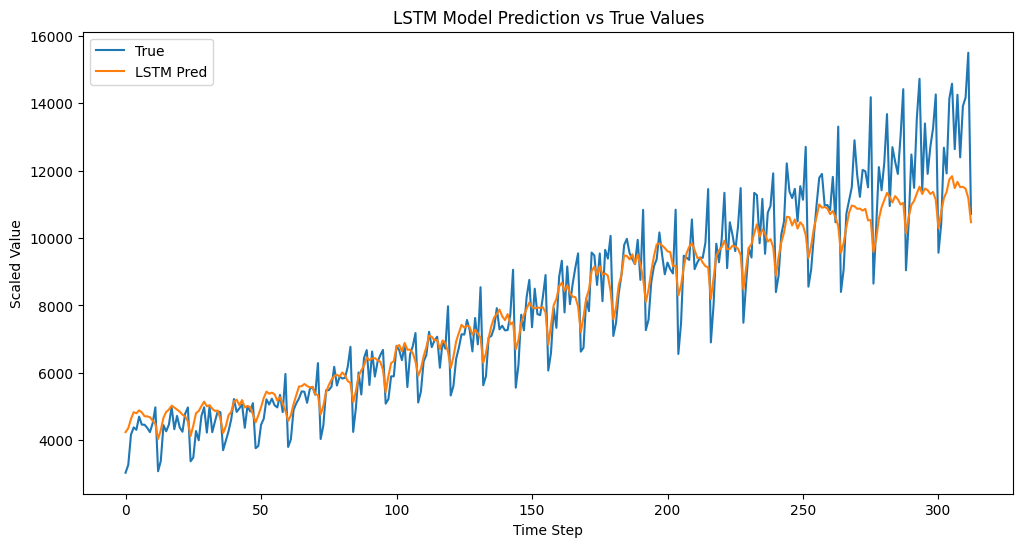

In [172]:
# LSTM 모델 예측
lstm_pred_test = lstm_model.predict(X_test)
lstm_pred_full = lstm_model.predict(X)

# LSTM 모델 MSE 계산
lstm_mse = mean_squared_error(y_test, lstm_pred_test)

print(f'LSTM 모델 테스트 데이터 MSE: {lstm_mse}')

# LSTM 모델 전체 데이터 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(lstm_pred_full), label='LSTM Pred')
plt.title('LSTM Model Prediction vs True Values')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [166]:
from sklearn.metrics import mean_squared_error

# RNN 모델 테스트 데이터에 대한 예측 수행
# RNN 모델 학습 셀을 먼저 실행하고 이 셀을 실행하세요.
rnn_pred_test = rnn_model.predict(X_test)

# RNN 모델 MSE 계산
rnn_mse = mean_squared_error(y_test, rnn_pred_test)

print(f'RNN 모델 테스트 데이터 MSE: {rnn_mse}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RNN 모델 테스트 데이터 MSE: 0.003271354178101447


In [173]:
from sklearn.metrics import mean_squared_error

# LSTM 모델 테스트 데이터에 대한 예측 수행
# LSTM 모델 학습 셀을 먼저 실행하고 이 셀을 실행하세요.
lstm_pred_test = lstm_model.predict(X_test)

# LSTM 모델 MSE 계산
lstm_mse = mean_squared_error(y_test, lstm_pred_test)

print(f'LSTM 모델 테스트 데이터 MSE: {lstm_mse}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
LSTM 모델 테스트 데이터 MSE: 0.017363210203462973
